In [ ]:
import re
import pandas as pd
import numpy as np
import spacy
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Remove non-alphabetic characters (Data Cleaning)
def clean_text(column):

    for row in column:
        row = re.sub('([A-Z][a-z]+)', r' \1', re.sub('([A-Z]+)', r' \1',  str(row))).split()
        row = ' '.join(row)
        row = re.sub("(\\t)", " ", str(row)).lower()
        row = re.sub("(\\r)", " ", str(row)).lower()
        row = re.sub("(\\n)", " ", str(row)).lower()

        # Remove the characters - <>()|&©ø"',;?~*!
        row = re.sub(r"[<>()|&©ø\[\]\'\",.\}`$\{;@?~*!+=_\//1234567890]", " ", str(row)).lower()
        row = re.sub(r"\\b(\\w+)(?:\\W+\\1\\b)+", "", str(row)).lower()


#         # Replace INC nums to INC_NUM
#         row = re.sub("([iI][nN][cC]\d+)", "INC_NUM", str(row)).lower()

#         # Replace CM# and CHG# to CM_NUM
#         row = re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", "CM_NUM", str(row)).lower()

        # Remove punctuations at the end of a word
        row = re.sub("(\.\s+)", " ", str(row)).lower()
        row = re.sub("(\-\s+)", " ", str(row)).lower()
        row = re.sub("(\:\s+)", " ", str(row)).lower()

        # Replace any url to only the domain name
        try:
            url = re.search(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", str(row))
            repl_url = url.group(3)
            row = re.sub(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", repl_url, str(row))
        except:
            pass
        #row = re.sub('([A-Z][a-z]+)', r' \1', re.sub('([A-Z]+)', r' \1',  str(row))).split()
        # Remove multiple spaces
        row = re.sub("(\s+)", " ", str(row)).lower()

        # Remove the single character hanging between any two spaces
        row = re.sub("(\s+.\s+)", " ", str(row)).lower()
        
        yield row

In [ ]:
#from google.colab import drive
# drive.mount("/content/gdrive")
# df_code = pd.read_csv('/content/drive/MyDrive/NLP/Project/javascript_train.csv')
df_code = pd.read_csv('/content/drive/MyDrive/NLP/Project/python_dataset.csv')
# df_code = df_code[:5000]
df_code.shape

(593891, 3)

In [ ]:
df_code.head()

,Unnamed: 0,code,docstring
0,0,"sorted(l, key=lambda x: (-int(x[1]), x[0]))",Sort a nested list by two elements
1,1,[int(x) for x in str(num)],converting integer to list in python
2,2,c.decode('unicode_escape'),Converting byte string in unicode string
3,3,"parser.add_argument('-t', dest='table', help='...",List of arguments with argparse
4,4,"datetime.datetime.strptime(s, '%Y-%m-%dT%H:%M:...",How to convert a Date string to a DateTime obj...


In [ ]:
df_code_p = df_code[["code","docstring"]]
df_code_p=df_code_p[:10000]

In [ ]:
print (df_code_p["docstring"][0])

Sort a nested list by two elements


In [ ]:
processed_code= clean_text(df_code_p['code'])
processed_summary = clean_text(df_code_p['docstring'])

In [ ]:

nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) 

# Process text as batches and yield Doc objects in order
code = [str(doc) for doc in nlp.pipe(processed_code, batch_size=50)]
summary = [ str(doc)  for doc in nlp.pipe(processed_summary, batch_size=50)]

#summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(processed_summary, batch_size=50)]

In [ ]:
print (summary)

['sort nested list by two elements', 'converting integer to list in python', 'converting byte string in unicode string', 'list of arguments with argparse', 'how to convert date string to date time object ', 'how to efficiently convert matlab engine arrays to numpy ndarray ', 'converting html to text with python', 'regex for repeating words in string in python', 'ordering list of dictionaries in python', 'two combination lists from one list', 'creating list of dictionaries in python', 'how to zip lists in list', 'how to display image in pygame ', 'two combination lists from one list', 'dynamic order in django-mptt', 'how to decode encode uri component in gae python ', 'clamping floating numbers in python ', 'how to binarize the values in pandas data frame ', 'how to extract all upper from string python', 'python regular expression matching multiline block of text', 'convert float to comma-separated string', 'get list of values from list of dictionaries in python', 'how do compare values

In [ ]:


df_code_p['code'] = code
df_code_p['docstring'] = summary
print(df_code_p)

                                                   code  \
0                             sorted key lambda -int x    
1                                   int for in str num    
2                              c decode unicode escape    
3         parser add argument -t dest table help nargs    
4     datetime datetime strptime % y-%m-%d t% h:% m:...   
...                                                 ...   
9995                                                      
9996    my rounded list round elem for elem in my list    
9997                                         db commit    
9998                                gb df groupby name    
9999                                    format decimal    

                                              docstring  
0                      sort nested list by two elements  
1                  converting integer to list in python  
2              converting byte string in unicode string  
3                       list of arguments with argparse  
4

Streaming output truncated to the last 5000 lines.
z set b set y pop 
 abcd bcd b cd b d bc ab cd ab d abc 
sck setproxy socks proxy type socks 
s reset index drop axis 
new array for in main array if not in second array 
x all b d f 
fig savefig desktop myplot pdf 
return render request main html context ord dict 
fig savefig so example png 
gtk main 
python -version
my module importlib import module os path 
my object all order -time 
print %i %i %i tuple number list 
cursor commit 
findtoure commentary find text re compile yaya toure 
random seed 
 b for b in zip : : 
list find gaps 
ttk style configure relief flat borderwidth 
return http response 
print sorted key my key 
plt savefig d:\\mpl logo with title png dpi dpi 
test numpy apply along axis lambda x in wanted test 
re sub ---- ---- data 
re findall \\b\\d \\b helpdesk agenten w kennziffer 
 and format join listy listy 
numpy apply along axis sum 
max index my list index max value 
re findall car rat a-z 
popen nohup script 

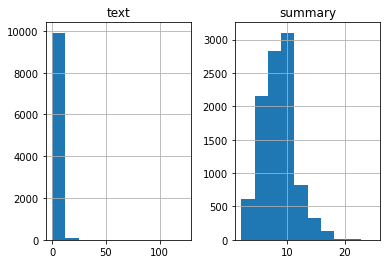

In [ ]:
 

 text_count = []
 summary_count = []


 print(df_code_p['code'])
 for sent in df_code_p['code']:
     print (sent)
     text_count.append(len(sent.split()))
    
 for sent in df_code_p['docstring']:
     summary_count.append(len(sent.split()))

 graph_df = pd.DataFrame() 

 graph_df['text'] = text_count
 graph_df['summary'] = summary_count

 graph_df.hist(bins = 10)
 plt.show()

In [ ]:
max_code_len = 100
max_summary_len =10


# Select the Summaries and Text which fall below max length 

cleaned_code = np.array(df_code_p['code'])
cleaned_summary= np.array(df_code_p['docstring'])

short_text = []
short_summary = []

for i in range(len(cleaned_code)):
    if len(cleaned_summary[i].split()) <= max_summary_len and len(cleaned_code[i].split()) <= max_code_len:
        short_text.append(cleaned_code[i])
        short_summary.append(cleaned_summary[i])
        
post_code = pd.DataFrame({'code': short_text,'summary': short_summary})

post_code.head(100)

,code,summary
0,sorted key lambda -int x,sort nested list by two elements
1,int for in str num,converting integer to list in python
2,c decode unicode escape,converting byte string in unicode string
3,parser add argument -t dest table help nargs,list of arguments with argparse
4,datetime datetime strptime % y-%m-%d t% h:% m:...,how to convert date string to date time object
...,...,...
95,date abc foo def bar ghi,creating dictionary from csv file
96,join line \n line \n,joining byte list with python
97,f close,write data to file in python
98,df sort values by date,sort pandas dataframe by date


In [ ]:
post_code['summary'] = post_code['summary'].apply(lambda x: 'sostok ' + x \
        + ' eostok')

post_code.head(2)

,code,summary
0,sorted key lambda -int x,sostok sort nested list by two elements eostok
1,int for in str num,sostok converting integer to list in python eo...


In [ ]:


x_train, x_validation, y_train, y_validation = train_test_split(
    np.array(post_code["code"]),
    np.array(post_code["summary"]),
    test_size=0.15,
    random_state=0,
    shuffle=True,
)

In [ ]:
# Tokenize the text to get the vocab count 
# Prepare a tokenizer on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_train))

threshold = 5

cnt_infrequent = 0
total_cnt = 0

for key, value in x_tokenizer.word_counts.items():
    total_cnt = total_cnt + 1
    if value < threshold:
        cnt_infrequent = cnt_infrequent + 1

    
print("% of not frequent words in vocabulary: ", (cnt_infrequent / total_cnt) * 100)

% of not frequent words in vocabulary:  75.42255472430035


In [ ]:
# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer = Tokenizer(num_words = total_cnt - cnt_infrequent) 
x_tokenizer.fit_on_texts(list(x_train))

# Convert text sequences to integer sequences 
x_train_seqs = x_tokenizer.texts_to_sequences(x_train) 
x_validation_seqs = x_tokenizer.texts_to_sequences(x_validation)
print (x_validation_seqs)
# Pad zero upto maximum length
x_train = pad_sequences(x_train_seqs,  maxlen=max_code_len, padding='post')
x_validation = pad_sequences(x_validation_seqs, maxlen=max_code_len, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1


print("Size of vocabulary in X = {}".format(x_voc))

[[10, 63], [3, 53, 10, 63, 45], [239, 265], [35], [49, 278], [56, 26, 24], [43, 2, 1], [15, 9, 273, 54, 44], [19, 49, 24, 51], [5, 8], [7, 69, 49], [740, 622, 18, 72], [114, 35, 241, 18, 224], [104, 7, 105, 26, 14, 124, 102], [141], [7, 69, 14, 130], [3, 389, 3, 94, 35, 107, 48], [14, 28, 182, 42, 218], [89], [34, 22, 127, 3, 53, 107, 242, 17, 75, 4, 57, 28], [502, 167, 232, 247, 66, 445], [68, 159, 19, 43, 159], [3, 237, 389], [55, 266, 18, 472, 484], [5, 832, 427, 856], [540, 92, 102], [39], [7, 222, 131], [47, 2, 1, 4, 133], [15, 146], [2, 1, 29], [567, 547, 10], [553, 86, 91, 63, 622, 115, 63, 48, 4, 17, 808], [65], [376, 227, 66, 212, 159, 308], [20, 56, 32], [112, 302, 645, 13, 192, 24], [79, 81, 726, 113], [7, 105, 11, 70, 70], [639, 157], [226, 24], [139, 97, 72, 522, 7, 105, 11, 70, 70, 11, 70, 70], [13, 98, 437, 87, 83], [821, 8, 72], [3, 154, 25, 57, 76, 25], [19, 227, 86, 72], [240, 240, 35, 110, 63], [4, 79, 57, 79, 530, 693], [5, 213, 136, 147, 590], [130, 2, 1, 21, 122, 

In [ ]:
# Prepare a tokenizer on testing data
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_train))

threshold = 5

cnt_infrequent = 0
total_cnt = 0

for key, value in y_tokenizer.word_counts.items():
    total_cnt = total_cnt + 1
    if value < threshold:
        cnt_infrequent = cnt_infrequent + 1
    
print("% of rare words in vocabulary:",(cnt_infrequent / total_cnt) * 100)

# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words = total_cnt - cnt_infrequent) 
y_tokenizer.fit_on_texts(list(y_train))

# Convert text sequences to integer sequences 
y_train_seqs = y_tokenizer.texts_to_sequences(y_train) 
y_validation_seqs = y_tokenizer.texts_to_sequences(y_validation)

# Pad zero upto maximum length
y_train = pad_sequences(y_train_seqs,  maxlen=max_summary_len, padding='post')
y_validation = pad_sequences(y_validation_seqs, maxlen=max_summary_len, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))

% of rare words in vocabulary: 70.1095461658842
Size of vocabulary in Y = 956


In [ ]:
ind = []

for i in range(len(y_train)):
    cnt = 0
    for j in y_train[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_train = np.delete(y_train, ind, axis=0)
x_train = np.delete(x_train, ind, axis=0)

In [ ]:
ind = []
for i in range(len(y_validation)):
    cnt = 0
    for j in y_validation[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_validation = np.delete(y_validation, ind, axis=0)
x_validation = np.delete(x_validation, ind, axis=0)

In [ ]:
print(len(x_train))
print(len(y_train))
print(len(x_validation))
print(len(y_validation))

6783
6783
1197
1197


In [ ]:
print((x_train[0]))
print((y_train[0]))

[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  1   6  17 816  14 133   9  36   2   0]


In [ ]:
latent_dim = 300
embedding_dim = 200

# Encoder
encoder_inputs = Input(shape=(max_code_len, ))

# Embedding layer
enc_emb = Embedding(x_voc, embedding_dim,
                    trainable=True)(encoder_inputs)

# Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output1, state_h1, state_c1) = encoder_lstm1(enc_emb)

# Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True,
                     return_state=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_output2, state_h2, state_c2) = encoder_lstm2(encoder_output1)

# Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True,
                     return_sequences=True, dropout=0.4,
                     recurrent_dropout=0.4)
(encoder_outputs, state_h, state_c) = encoder_lstm3(encoder_output2)

# Set up the decoder, using encoder_states as the initial state
decoder_inputs = Input(shape=(None, ))

# Embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm = LSTM(latent_dim, return_sequences=True,
                    return_state=True, dropout=0.4,
                    recurrent_dropout=0.2)
(decoder_outputs, decoder_fwd_state, decoder_back_state) = \
    decoder_lstm(dec_emb, initial_state=[state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 200)     177600      ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 100, 300),   601200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [ ]:
history = model.fit(
    [x_train, y_train[:, :-1]],
    y_train.reshape(y_train.shape[0], y_train.shape[1], 1)[:, 1:],
    epochs=5, #50
    callbacks=[es],
    batch_size=16,
    validation_data=([x_validation, y_validation[:, :-1]],
                     y_validation.reshape(y_validation.shape[0], y_validation.shape[1], 1)[:
                     , 1:]),
    )

Epoch 1/5
424/424 [==============================] - 521s 1s/step - loss: 3.6990 - val_loss: 3.3020
Epoch 2/5
424/424 [==============================] - 504s 1s/step - loss: 3.2675 - val_loss: 3.1140
Epoch 3/5
424/424 [==============================] - 503s 1s/step - loss: 3.0838 - val_loss: 2.9933
Epoch 4/5
424/424 [==============================] - 500s 1s/step - loss: 2.9790 - val_loss: 2.9508
Epoch 5/5
424/424 [==============================] - 500s 1s/step - loss: 2.9190 - val_loss: 2.8764


In [ ]:
model.save('/content/drive/MyDrive/NLP/Project/saved_model')

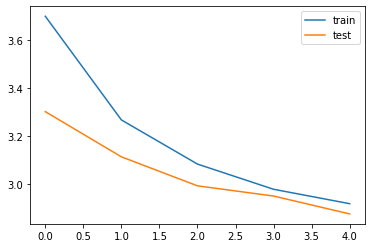

In [ ]:

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
 reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = x_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [ ]:
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                      state_h, state_c])

# Decoder setup

# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim, ))
decoder_state_input_c = Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_code_len, latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
(decoder_outputs2, state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                      decoder_state_input_h, decoder_state_input_c],
                      [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):

    # Encode the input as state vectors.
    (e_out, e_h, e_c) = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))

    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder_model.predict([target_seq]
                + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        # Exit condition: either hit max length or find the stop word.
        if sampled_token == 'eostok' or len(decoded_sentence.split()) \
            >= max_summary_len - 1:
            stop_condition = True

        # Update the target sequence (of length 1)
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        (e_h, e_c) = (h, c)

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i != target_word_index['sostok'] and i \
            != target_word_index['eostok']:
            newString = newString + reverse_target_word_index[i] + ' '

    return newString


# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index[i] + ' '

    return newString

In [ ]:
for i in range(0, 19):
    print ('Code:', seq2text(x_train[i]))
    print ('Original summary:', seq2summary(y_train[i]))
    print ('Predicted summary:', decode_sequence(x_train[i].reshape(1,
           max_code_len)))
    print ('\n')


Code: plt 
Original summary: how do tell matplotlib that with plot 
1/1 [==============================] - 0s 18ms/step
Predicted summary:  how to get the of in python


Code: return render to response html form form 
Original summary: to get value from form field in django framework 
1/1 [==============================] - 0s 19ms/step
Predicted summary:  how to get the of in python


Code: y list 
Original summary: how to create an list in python 
1/1 [==============================] - 0s 19ms/step
Predicted summary:  how to get the of in python


Code: d dict get k for v in list items 
Original summary: one line expression to map dictionary to another 
1/1 [==============================] - 0s 17ms/step
Predicted summary:  how to get the of in python


Code: request args get 
Original summary: getting request parameter in jinja 
1/1 [==============================] - 0s 18ms/step
Predicted summary:  how to get the of in python


Code: os listdir folder folder folder 
Original summary

#### Evaluation of LSTM seq2seq model using BLEU score on test data

In [ ]:
df_code_test = pd.read_csv('/content/drive/MyDrive/NLP/Project/python_test_dataset.csv')
df_code_test.shape

(99, 2)

In [ ]:
print (df_code_test["docstring"][0])

How to convert a list of multiple integers into a single integer?


In [ ]:
processed_code_test= clean_text(df_code_test['code'])
processed_summary_test = clean_text(df_code_test['docstring'])

In [ ]:

nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) 

# Process text as batches and yield Doc objects in order
code_test = [str(doc) for doc in nlp.pipe(processed_code_test, batch_size=20)]
summary_test = [ str(doc)  for doc in nlp.pipe(processed_summary_test, batch_size=20)]

#summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(processed_summary, batch_size=50)]

In [ ]:
df_code_test['code'] = code_test
df_code_test['docstring'] = summary_test
print(df_code_test)

                                                 code  \
0                         sum i for d in enumerate :    
1                                 r int join map str    
2               datetime strptime y-%m-%d h:% m:% %f    
3                        sum len for j in list items    
4                                                zip    
..                                                ...   
94                               numpy random random    
95                                          df df df    
96   value for key value in list programs items if...   
97               sys path append path to main folder    
98                                  re findall \\d s    

                                            docstring  
0   how to convert list of multiple integers into ...  
1   how to convert list of multiple integers into ...  
2   how to convert datetime string back to datetim...  
3   averaging the values in dictionary based on th...  
4                                 z

Streaming output truncated to the last 5000 lines.
z set b set y pop 
 abcd bcd b cd b d bc ab cd ab d abc 
sck setproxy socks proxy type socks 
s reset index drop axis 
new array for in main array if not in second array 
x all b d f 
fig savefig desktop myplot pdf 
return render request main html context ord dict 
fig savefig so example png 
gtk main 
python -version
my module importlib import module os path 
my object all order -time 
print %i %i %i tuple number list 
cursor commit 
findtoure commentary find text re compile yaya toure 
random seed 
 b for b in zip : : 
list find gaps 
ttk style configure relief flat borderwidth 
return http response 
print sorted key my key 
plt savefig d:\\mpl logo with title png dpi dpi 
test numpy apply along axis lambda x in wanted test 
re sub ---- ---- data 
re findall \\b\\d \\b helpdesk agenten w kennziffer 
 and format join listy listy 
numpy apply along axis sum 
max index my list index max value 
re findall car rat a-z 
popen nohup script 

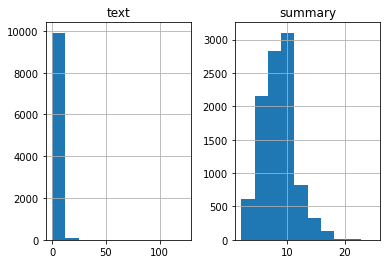

In [ ]:
text_count = []
summary_count = []


print(df_code_p['code'])
for sent in df_code_p['code']:
    print (sent)
    text_count.append(len(sent.split()))

for sent in df_code_p['docstring']:
    summary_count.append(len(sent.split()))

graph_df = pd.DataFrame() 

graph_df['text'] = text_count
graph_df['summary'] = summary_count

graph_df.hist(bins = 10)
plt.show()

In [ ]:
max_code_len = 100
max_summary_len =10


# Select the Summaries and Text which fall below max length 

cleaned_code_test = np.array(df_code_test['code'])
cleaned_summary_test= np.array(df_code_test['docstring'])

short_text_test = []
short_summary_test = []

for i in range(len(cleaned_code_test)):
    if len(cleaned_summary_test[i].split()) <= max_summary_len and len(cleaned_code_test[i].split()) <= max_code_len:
        short_text_test.append(cleaned_code_test[i])
        short_summary_test.append(cleaned_summary_test[i])
        
post_code_test = pd.DataFrame({'code': short_text_test,'summary': short_summary_test})

post_code_test.head(10)

,code,summary
0,sum i for d in enumerate :,how to convert list of multiple integers into ...
1,r int join map str,how to convert list of multiple integers into ...
2,datetime strptime y-%m-%d h:% m:% %f,how to convert datetime string back to datetim...
3,sum len for j in list items,averaging the values in dictionary based on th...
4,zip,zip lists in python
5,hello format for in,prepend the same string to all items in list
6,re sub \\ \\ :\\s \\ :\\s \\ \\ \\,regex for repeating words in string in python
7,df div df sum axis axis,normalizing pandas data frame by row
8,map lambda t mylist,swap values in tuple list inside list in python
9,t for in mylist,swap values in tuple list inside list in python


In [ ]:
post_code_test['summary'] = post_code_test['summary'].apply(lambda x: 'sostok ' + x \
        + ' eostok')

post_code_test.head(2)

,code,summary
0,sum i for d in enumerate :,sostok how to convert list of multiple integer...
1,r int join map str,sostok how to convert list of multiple integer...


In [ ]:
x_test = np.array(post_code_test['code'])
y_test = np.array(post_code_test['summary'])


In [ ]:
# Tokenize the text to get the vocab count 
# Prepare a tokenizer on training data
x_tokenizer_test = Tokenizer() 
x_tokenizer_test.fit_on_texts(list(x_test))

threshold = 5

cnt_infrequent_test = 0
total_cnt_test = 0

for key, value in x_tokenizer_test.word_counts.items():
    total_cnt_test = total_cnt_test + 1
    if value < threshold:
        cnt_infrequent_test = cnt_infrequent_test + 1

    
print("% of not frequent words in vocabulary: ", (cnt_infrequent_test / total_cnt_test) * 100)

% of not frequent words in vocabulary:  89.17525773195877


In [ ]:
# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer_test = Tokenizer(num_words = total_cnt_test - cnt_infrequent_test) 
x_tokenizer_test.fit_on_texts(list(x_test))

# Convert text sequences to integer sequences 
x_test_seqs = x_tokenizer_test.texts_to_sequences(x_test) 
# x_validation_seqs = x_tokenizer.texts_to_sequences(x_validation)
# print (x_validation_seqs)
# Pad zero upto maximum length
x_test = pad_sequences(x_test_seqs,  maxlen=max_code_len, padding='post')
# x_validation = pad_sequences(x_validation_seqs, maxlen=max_code_len, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc_test = x_tokenizer_test.num_words + 1


print("Size of vocabulary in X = {}".format(x_voc_test))

Size of vocabulary in X = 22


In [ ]:
# Prepare a tokenizer on testing data
y_tokenizer_test = Tokenizer()   
y_tokenizer_test.fit_on_texts(list(y_test))

threshold = 5

cnt_infrequent_test = 0
total_cnt_test = 0

for key, value in y_tokenizer_test.word_counts.items():
    total_cnt_test = total_cnt_test + 1
    if value < threshold:
        cnt_infrequent_test = cnt_infrequent_test + 1
    
print("% of rare words in vocabulary:",(cnt_infrequent_test / total_cnt_test) * 100)

# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer_test = Tokenizer(num_words = total_cnt_test - cnt_infrequent_test) 
y_tokenizer_test.fit_on_texts(list(y_test))

# Convert text sequences to integer sequences 
y_test_seqs = y_tokenizer_test.texts_to_sequences(y_test) 
# y_validation_seqs = y_tokenizer.texts_to_sequences(y_validation)

# Pad zero upto maximum length
y_test = pad_sequences(y_test_seqs,  maxlen=max_summary_len, padding='post')
# y_validation = pad_sequences(y_validation_seqs, maxlen=max_summary_len, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc_test = y_tokenizer_test.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc_test))

% of rare words in vocabulary: 86.95652173913044
Size of vocabulary in Y = 28


In [ ]:
ind = []

for i in range(len(y_test)):
    cnt = 0
    for j in y_test[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

y_test = np.delete(y_test, ind, axis=0)
x_test = np.delete(x_test, ind, axis=0)

In [ ]:
print(len(x_test))
print(len(y_test))

82
82


In [ ]:
print((x_test[0]))
print((y_test[0]))

[18  2 10  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]
[ 1  9  5 12  6  7 15  2  0  0]


In [ ]:
file1 = open(r'/content/drive/MyDrive/NLP/Project/Test output/test_code.txt', 'a+')
file2 = open(r'/content/drive/MyDrive/NLP/Project/Test output/test_summary.txt', 'a+')
file3 = open(r'/content/drive/MyDrive/NLP/Project/Test output/predicted_summary.txt', 'a+')
for i in range(len(x_test)):
    print ('Code:', seq2text(x_test[i]))
    file1.write(seq2text(x_test[i])+"\n")
    print ('Original summary:', seq2summary(y_test[i]))
    file2.write(seq2summary(y_test[i])+"\n")
    print ('Predicted summary:', decode_sequence(x_test[i].reshape(1,max_code_len)))
    file3.write(decode_sequence(x_test[i].reshape(1, max_code_len))+"\n")
    print ('\n')


Code: set for key in 
Original summary: with to pandas how of array 
1/1 [==============================] - 0s 18ms/step
Predicted summary:  how to get the of in python
1/1 [==============================] - 0s 17ms/step


Code: 
Original summary: with to pandas how of array 
1/1 [==============================] - 0s 18ms/step
Predicted summary:  how to get the of in python
1/1 [==============================] - 0s 19ms/step


Code: np key 
Original summary: with to pandas get list to get 
1/1 [==============================] - 0s 16ms/step
Predicted summary:  how to get the of in python
1/1 [==============================] - 0s 18ms/step


Code: set for in list x 
Original summary: using data python string using 
1/1 [==============================] - 0s 16ms/step
Predicted summary:  how to get the of in python
1/1 [==============================] - 0s 21ms/step


Code: a 
Original summary: from python in 
1/1 [==============================] - 0s 17ms/step
Predicted summary:  how to 

In [ ]:
file1.close()
file2.close()
file3.close()

In [ ]:
! pip install sacremoses
!pip install sacrebleu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 880 kB 28.4 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=92192012a7e0b9fee59aebf11bcd67fd98b01bbca3699d238f1042e1fd0f61bc
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 118 kB 28.8 MB/s 


In [ ]:
import sys
import sacrebleu
from sacremoses import MosesDetokenizer
md = MosesDetokenizer(lang='en')

target_test =  "/content/drive/MyDrive/NLP/Project/Test output/test_summary.txt" # Test file argument
target_pred = "/content/drive/MyDrive/NLP/Project/Test output/predicted_summary.txt"  # MTed file argument

# Open the test dataset human translation file and detokenize the references
refs = []

with open(target_test) as test:
    for line in test:  
        refs.append(line)
    
print("Reference 1st sentence:", refs[0])

# Open the translation file by the NMT model and detokenize the predictions
preds = []

with open(target_pred) as pred:  
    for line in pred:  
        preds.append(line)

sum=0
n=0
write_path = "/content/drive/MyDrive/NLP/Project/Test output/bleu_score_comment_genration.txt"
# Calculate BLEU for sentence by sentence and save the result to a file
with open(write_path, "w+") as output:
    for line in zip(refs,preds):
        test = line[0]
        pred = line[1]
        print(test, "\t--->\t", pred)
        bleu = sacrebleu.sentence_bleu(pred, [test], smooth_method='exp')
        sum+=bleu.score
        n+=1
        print(bleu.score, "\n")
        output.write(str(bleu.score) + "\n")

print(sum/n)

Reference 1st sentence: with to pandas how of array 

with to pandas how of array 
 	--->	  how to get the of in python

8.643019616048525 

with to pandas how of array 
 	--->	  how to get the of in python

8.643019616048525 

with to pandas get list to get 
 	--->	  how to get the of in python

13.134549472120788 

using data python string using 
 	--->	  how to get the of in python

6.567274736060395 

from python in 
 	--->	  how to get the of in python

7.809849842300637 

using list to python how 
 	--->	  how to get the of in python

8.643019616048525 

python list python in 
 	--->	  how to get the of in python

7.809849842300637 

do 
 	--->	  how to get the of in python

0.0 

data python how how python in 
 	--->	  how to get the of in python

8.643019616048525 

data python how how python in 
 	--->	  how to get the of in python

8.643019616048525 

python in 
 	--->	  how to get the of in python

7.809849842300637 

in list do 
 	--->	  how to get the of in python

6.56727

- BLEU score acheived on test set is : 7.7931164303774105 